<h2><b>Regression Lineaire From Scratch</b></h2>

<h4><b>y = w * x + b</b></h4>

<h3>I - La methode des moindre carres</h3>

In [199]:
import numpy as np
import matplotlib.pyplot as plt
# from model import Linear_Regression

<h2> Un dataset atypique : A l'aide de np.random + Visualisations</h2>

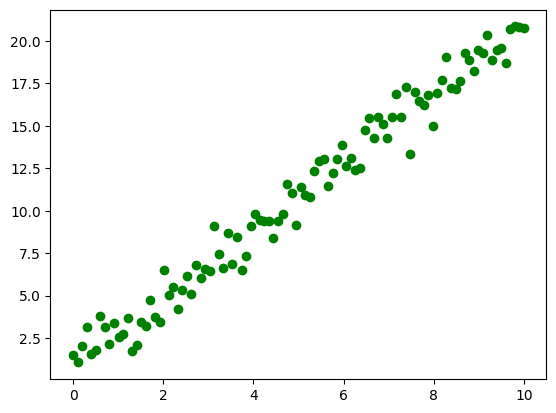

In [200]:
np.random.seed(42)
m = 100 #Creationg 100 samples
X = np.linspace(0,10,m).reshape(m,1) #Generation des donnes d'exemples
y = 2 * X + 1 + np.random.randn(m,1) # ax+b plus le bruit
plt.scatter(X,y,c='g')

<h2>Calcul des coefficients w et b </h2>

w initial : 2 et b initial : 1
La nouvelle donnees : [2.01379327] et l'ordonnee [0.82718715]


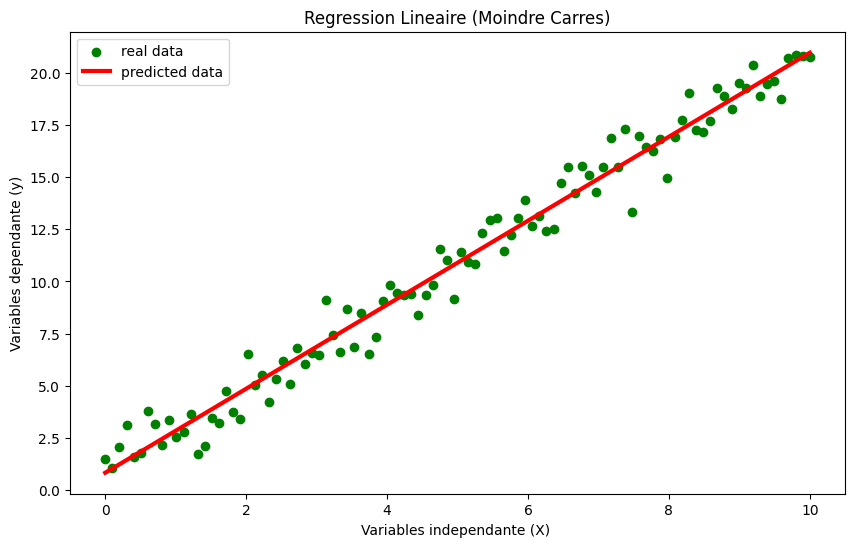

In [ ]:
# Ajout de la colonnes de 1 a X pour inclure l'ordonnes a l'origine (biais)

X_b = np.c_[np.ones((X.shape[0],1)),X]

# Calcul des coefficients de la regression lineaire.

coefs = np.dot(np.linalg.inv(np.dot(X_b.T,X_b)),np.dot(X_b.T,y))

# Affichage des coefficients
b = coefs[0]
w = coefs[1]
y_pred = X_b.dot(coefs)
print(f"w initial : 2 et b initial : 1")
print(f"La nouvelle donnees : {w} et l'ordonnee {b}")

plt.figure(figsize=(10,6))

plt.scatter(X,y,label='real data',c='g')
plt.plot(X,y_pred,label='predicted data',lw='3',c='r')
plt.xlabel('Variables independante (X) ')
plt.ylabel('Variables dependante (y)')
plt.title('Regression Lineaire (Moindre Carres)')
plt.legend()
plt.show()

<h2>Evaluation du coefficient R2</h2>

In [202]:
me = len(y) * np.mean((y - y_pred) ** 2)
ma =len(y) * np.mean(y - np.mean(y) ** 2)
# Erreur quadratique moyenne

R2 = 1 - me/ma
print(R2) 

1.0075573092722736


<p>Un R^2 proche de 1 signifie que le modele fait de tres bonne precision. Contrairement a un R^2 proche de 0</p>

<h3>II - La methode de la descente de Gradient</h3>

<h3>Donnees (Datasets) </h3>

(100, 1)
(100, 1)


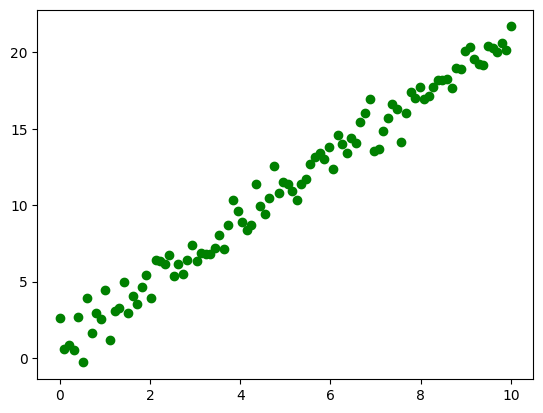

In [203]:
from model import z_score_normalize
np.random.seed(1)
m = 100 #Creationg 100 samples
x = np.linspace(0,10,m).reshape(m,1) #Generation des donnes d'exemples
y = 2 * x + 1 + np.random.randn(m,1)
plt.scatter(x,y,c='g')
print(x.shape)
print(y.shape)

In [204]:
 # Matrice de X  : Shape (m,2)
X = np.hstack((x,np.ones(x.shape))) #Executer la cellule des donnes pour reinitialise X 
print(X.shape)


(100, 2)


In [205]:
theta = np.random.randn(2,1)

Model

In [206]:
def model (X,theta):
    return X.dot(theta)

Fonction cout

In [207]:
def cost_function(X,y,theta):
    m = len(y)
    return 1 / 2*m * np.sum((model(X,theta) - y) ** 2)    

Gradients et descentes de gradients

In [208]:
def grad(X,y,theta) :
    m = len(y)
    return 1/m * X.T.dot((model(X,theta)) - y)

In [209]:
def gradient_descent(X,y,theta,learning_rate,n_iter) : 

    cost_history = np.zeros((n_iter))

    for i in range(n_iter):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)


    return theta,cost_history

Valeur des coefficients w et b

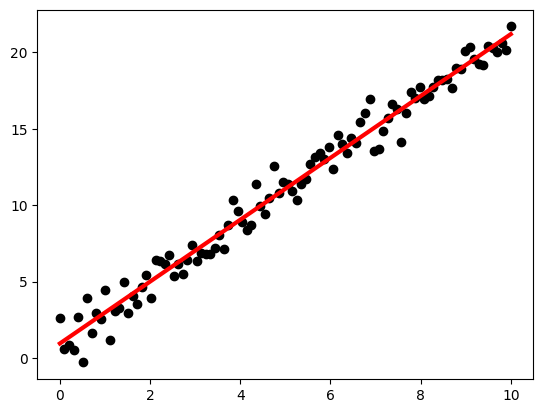

In [210]:
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate=0.01,n_iter=1000)
predictions = model(X,theta_final)
plt.scatter(x,y,c='black')
plt.plot(x,predictions,lw='3',c='r')

<h2>Courbe d'apprentissage</h2>

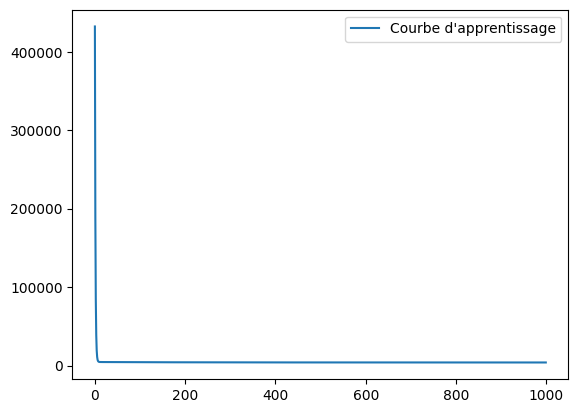

In [213]:
plt.plot(range(0,1000),cost_history,label = "Courbe d'apprentissage")
plt.legend()
plt.show()

<h2>Coefficient de determination</h2>

In [222]:
def coef_determination (y,pred):
    u = np.sum((y - pred)**2)
    v = np.sum((y - y.mean())**2)
    return 1 - u/v
print(f"Le coef de determination obtenu est de :{coef_determination(y,predictions)} soit {100*coef_determination(y,predictions):.2f}%")

Le coef de determination obtenu est de :0.9784207269178374 soit 97.84%
